### Importing Librarires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import LeavePGroupsOut
from sklearn.model_selection import GroupShuffleSplit

from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df_crash= pd.read_csv('/content/crash_info.csv')
df_segment= pd.read_csv('/content/segment_info.csv')
df_speed= pd.read_csv('/content/speed.csv')

In [ ]:
df_crash.head()

,event_id,segment_id,event_subtype,start_tstamp,closed_tstamp,precipitation_flag,precip_rate,speed_at_crash,reference_speed,arrived,...,vehicle_count,Car_count,SUV_count,Tractor_count,Bus_count,Car&Trailor_count,van_count,overturned,Jack Knifed,Lost_Load
0,event_0,segment_599,accident,2019-01-01 00:17:09-05:00,2019-01-01 00:51:23-05:00,Rain,0.62,56.0,56.0,2019-01-01 00:17:13-05:00,...,0,0,0,0,0,0,0,0,0,0
1,event_1,segment_853,accident,2019-01-01 00:44:59-05:00,2019-01-01 01:13:24-05:00,No Percipitation,0.00,55.0,56.0,2019-01-01 00:45:07-05:00,...,0,0,0,0,0,0,0,0,0,0
2,event_2,segment_600,accident,2019-01-01 01:01:37-05:00,2019-01-01 01:16:49-05:00,No Percipitation,0.00,57.0,64.0,2019-01-01 01:01:41-05:00,...,0,0,0,0,0,0,0,0,0,0
3,event_3,segment_1209,injury accident,2019-01-01 01:30:04-05:00,2019-01-01 02:35:53-05:00,No Percipitation,0.00,50.0,38.0,2019-01-01 01:32:07-05:00,...,1,1,0,0,0,0,0,0,0,0
4,event_4,segment_2088,accident,2019-01-01 02:20:22-05:00,2019-01-01 02:44:17-05:00,No Percipitation,0.00,43.0,43.0,2019-01-01 02:22:06-05:00,...,1,1,0,0,0,0,0,0,0,0


In [ ]:
df_segment.head()

,segment_id,road,direction,miles,road_class,func_class,aadt
0,segment_0,road_11000065,WESTBOUND,0.537277,Interstate,3,39821
1,segment_1,road_11000065,EASTBOUND,0.873947,Interstate,3,46061
2,segment_2,road_11000065,EASTBOUND,0.831921,Interstate,3,10938
3,segment_3,road_11000065,WESTBOUND,0.654299,Interstate,3,41522
4,segment_4,road_11000065,WESTBOUND,0.817158,Interstate,3,32572


In [ ]:
df_speed.head()

,segment_id,measurement_tstamp,speed
0,segment_879,2019-01-01 00:00:00-05:00,57.2
1,segment_879,2019-01-01 00:05:00-05:00,56.4
2,segment_879,2019-01-01 00:10:00-05:00,56.6
3,segment_879,2019-01-01 00:15:00-05:00,57.0
4,segment_879,2019-01-01 00:20:00-05:00,57.0


In [ ]:
df_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13496 entries, 0 to 13495
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id            13496 non-null  object 
 1   segment_id          13496 non-null  object 
 2   event_subtype       13496 non-null  object 
 3   start_tstamp        13496 non-null  object 
 4   closed_tstamp       13496 non-null  object 
 5   precipitation_flag  13496 non-null  object 
 6   precip_rate         13487 non-null  float64
 7   speed_at_crash      13308 non-null  float64
 8   reference_speed     13308 non-null  float64
 9   arrived             13052 non-null  object 
 10  notified            8589 non-null   object 
 11  total_lanes         12908 non-null  float64
 12  open_lanes          12908 non-null  float64
 13  closed_lanes        12908 non-null  float64
 14  unknown_lanes       12908 non-null  float64
 15  road_condition      13496 non-null  object 
 16  vehi

In [ ]:
df_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   segment_id  2133 non-null   object 
 1   road        2133 non-null   object 
 2   direction   2133 non-null   object 
 3   miles       2133 non-null   float64
 4   road_class  2133 non-null   object 
 5   func_class  2133 non-null   int64  
 6   aadt        2133 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 116.8+ KB


In [ ]:
df_speed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253288 entries, 0 to 3253287
Data columns (total 3 columns):
 #   Column              Dtype  
---  ------              -----  
 0   segment_id          object 
 1   measurement_tstamp  object 
 2   speed               float64
dtypes: float64(1), object(2)
memory usage: 74.5+ MB


In [ ]:
# Convert 'start_tstamp' and 'closed_tstamp' to datetime with timezone awareness
df_crash['start_tstamp'] = pd.to_datetime(df_crash['start_tstamp'], utc=True)
df_crash['closed_tstamp'] = pd.to_datetime(df_crash['closed_tstamp'], utc=True)

# Convert from UTC to Eastern Time (ET)
df_crash['start_tstamp'] = df_crash['start_tstamp'].dt.tz_convert('US/Eastern')
df_crash['closed_tstamp'] = df_crash['closed_tstamp'].dt.tz_convert('US/Eastern')

df_crash[['start_tstamp', 'closed_tstamp']].head()

,start_tstamp,closed_tstamp
0,2019-01-01 00:17:09-05:00,2019-01-01 00:51:23-05:00
1,2019-01-01 00:44:59-05:00,2019-01-01 01:13:24-05:00
2,2019-01-01 01:01:37-05:00,2019-01-01 01:16:49-05:00
3,2019-01-01 01:30:04-05:00,2019-01-01 02:35:53-05:00
4,2019-01-01 02:20:22-05:00,2019-01-01 02:44:17-05:00


In [ ]:
# Convert start_tstamp and closed_tstamp to naive local Eastern Time
df_crash['start_tstamp'] = df_crash['start_tstamp'].dt.tz_localize(None)
df_crash['closed_tstamp'] = df_crash['closed_tstamp'].dt.tz_localize(None)

df_crash[['start_tstamp', 'closed_tstamp']].head()


,start_tstamp,closed_tstamp
0,2019-01-01 00:17:09,2019-01-01 00:51:23
1,2019-01-01 00:44:59,2019-01-01 01:13:24
2,2019-01-01 01:01:37,2019-01-01 01:16:49
3,2019-01-01 01:30:04,2019-01-01 02:35:53
4,2019-01-01 02:20:22,2019-01-01 02:44:17


In [ ]:
# Calculate the duration of each crash
df_crash['duration'] = (df_crash['closed_tstamp'] - df_crash['start_tstamp']).dt.total_seconds() / 60

In [ ]:
df_crash['duration'].head()

,duration
0,34.233333
1,28.416667
2,15.200000
3,65.816667
4,23.916667


## Analysis 1: Distibution of Crash Duration

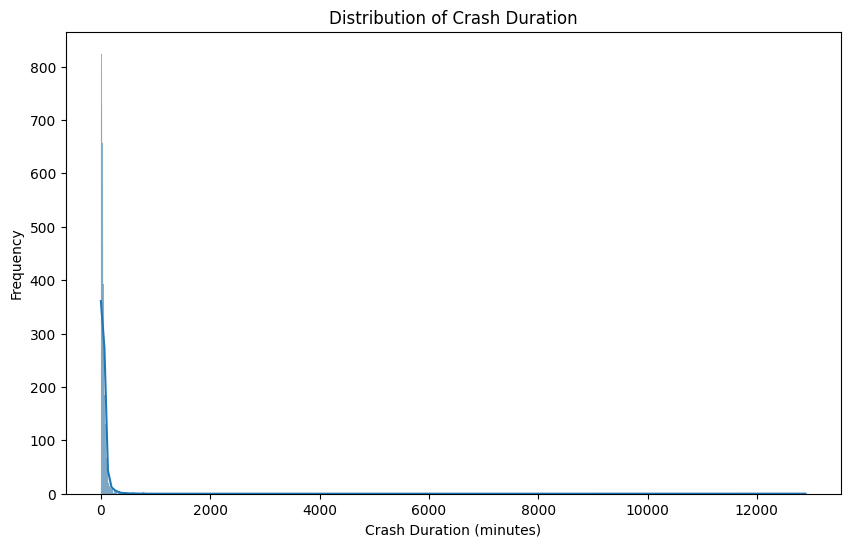

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_crash['duration'], kde=True)
plt.title('Distribution of Crash Duration')
plt.xlabel('Crash Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

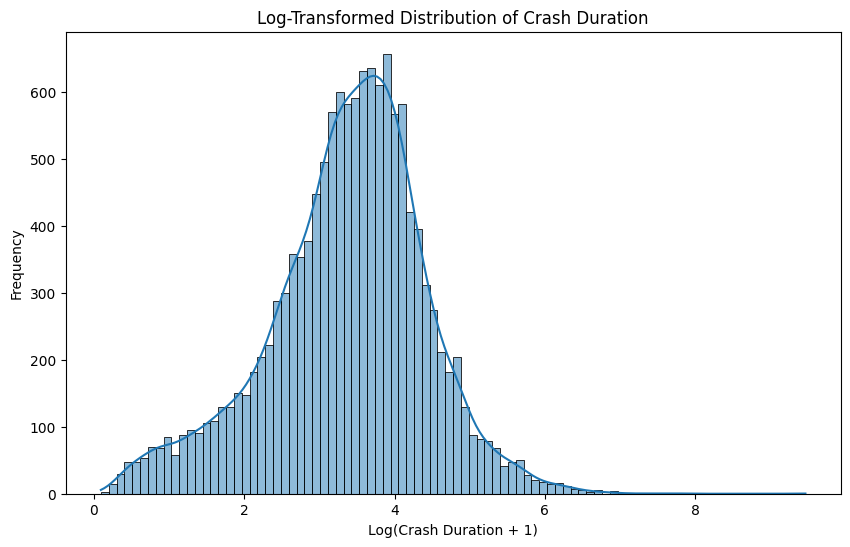

In [ ]:
df_crash['log_duration'] = np.log1p(df_crash['duration'])  # Applying log(1 + duration)
plt.figure(figsize=(10, 6))
sns.histplot(df_crash['log_duration'], kde=True)
plt.title('Log-Transformed Distribution of Crash Duration')
plt.xlabel('Log(Crash Duration + 1)')
plt.ylabel('Frequency')
plt.show()

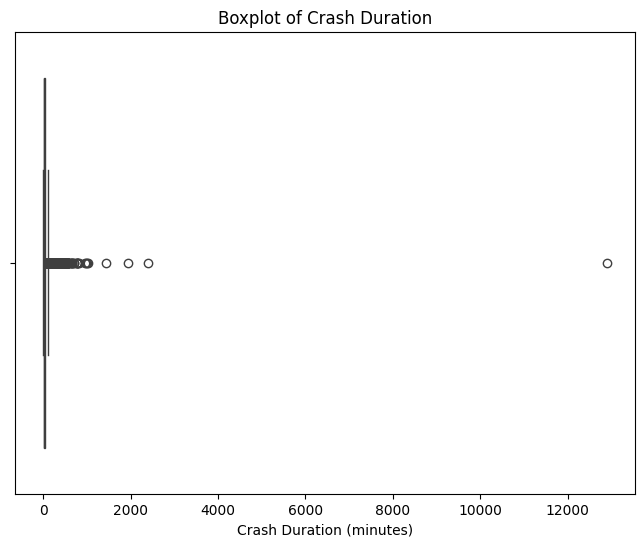

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_crash['duration'])
plt.title('Boxplot of Crash Duration')
plt.xlabel('Crash Duration (minutes)')
plt.show()

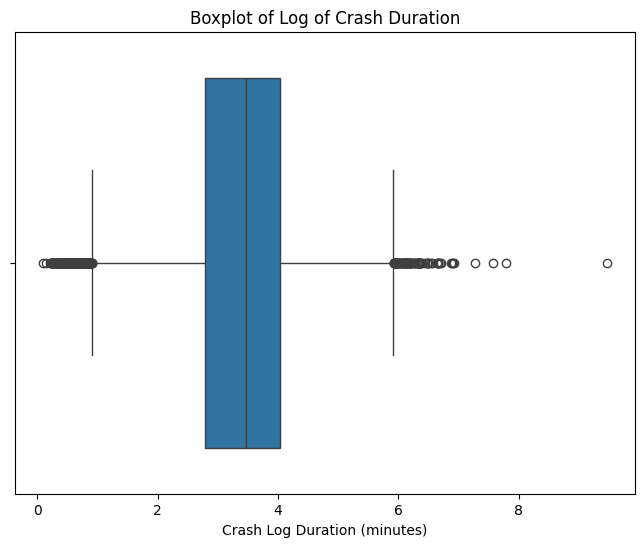

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_crash['log_duration'])
plt.title('Boxplot of Log of Crash Duration')
plt.xlabel('Crash Log Duration (minutes)')
plt.show()

In [ ]:
# Extracting hour, day of the week, and month from start_tstamp
df_crash['hour'] = df_crash['start_tstamp'].dt.hour
df_crash['day_of_week'] = df_crash['start_tstamp'].dt.day_name()
df_crash['month'] = df_crash['start_tstamp'].dt.month_name()

## Analysis 2: Temporal Distribution of crash duration

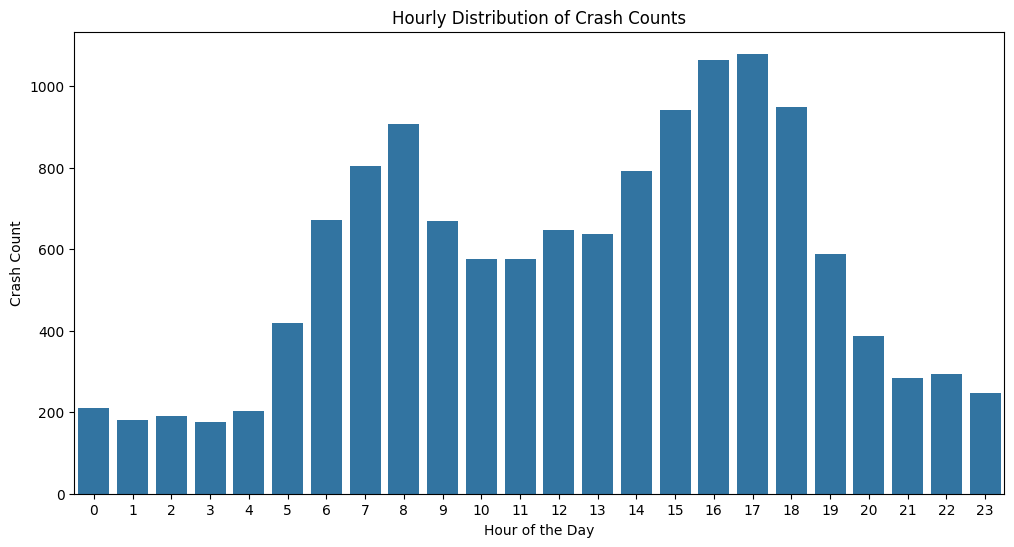

In [ ]:
# Hourly distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df_crash, order=range(0, 24))
plt.title('Hourly Distribution of Crash Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Crash Count')
plt.show()

In [ ]:
# prompt: make deciles of hours



,hour
0.0,0.0
0.1,5.0
0.2,7.0
0.3,9.0
0.4,11.0
0.5,13.0
0.6,15.0
0.7,16.0
0.8,18.0
0.9,19.0


### Observation: Number of accidents increasing in peak hours

In [ ]:
df_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13496 entries, 0 to 13495
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   event_id            13496 non-null  object        
 1   segment_id          13496 non-null  object        
 2   event_subtype       13496 non-null  object        
 3   start_tstamp        13496 non-null  datetime64[ns]
 4   closed_tstamp       13496 non-null  datetime64[ns]
 5   precipitation_flag  13496 non-null  object        
 6   precip_rate         13487 non-null  float64       
 7   speed_at_crash      13308 non-null  float64       
 8   reference_speed     13308 non-null  float64       
 9   arrived             13052 non-null  object        
 10  notified            8589 non-null   object        
 11  total_lanes         12908 non-null  float64       
 12  open_lanes          12908 non-null  float64       
 13  closed_lanes        12908 non-null  float64   

In [ ]:
df_crash[['duration', 'duration_capped', 'log_duration', 'vehicle_count', 'hour', 'speed_at_crash', 'total_lanes', 'open_lanes']].describe()

,duration,duration_capped,log_duration,vehicle_count,hour,speed_at_crash,total_lanes,open_lanes
count,13496.000000,13496.000000,13496.000000,13496.000000,13496.000000,13308.000000,12908.000000,12908.000000
mean,48.045047,45.270346,3.369801,1.672347,12.581802,46.934476,12.455377,8.718702
std,129.479496,50.060929,1.044738,1.375569,5.501737,18.488403,3.814715,4.135289
min,0.100000,0.100000,0.095310,0.000000,0.000000,2.000000,2.000000,0.000000
25%,15.200000,15.200000,2.785011,1.000000,8.000000,32.000000,10.000000,6.000000
50%,31.133333,31.133333,3.469894,2.000000,13.000000,53.000000,13.000000,8.000000
75%,55.637500,55.637500,4.036671,2.000000,17.000000,62.000000,14.000000,12.000000
max,12888.533333,307.355833,9.464171,54.000000,23.000000,82.000000,32.000000,31.000000


In [ ]:
# prompt: make 10 quartile distribution of hour

# Calculate deciles for the 'hour' column
deciles = df_crash['hour'].quantile(np.linspace(0, 1, 11))

# Print the deciles
deciles

,hour
0.0,0.0
0.1,5.0
0.2,7.0
0.3,9.0
0.4,11.0
0.5,13.0
0.6,15.0
0.7,16.0
0.8,18.0
0.9,19.0


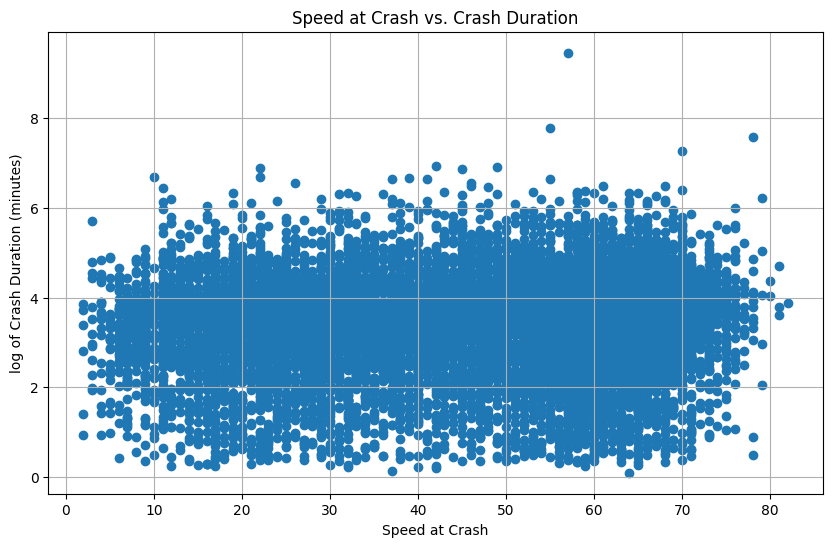

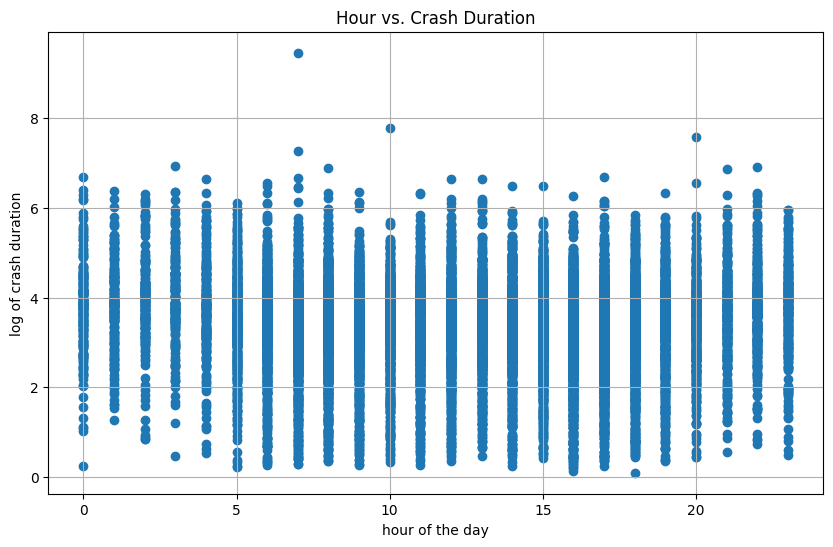

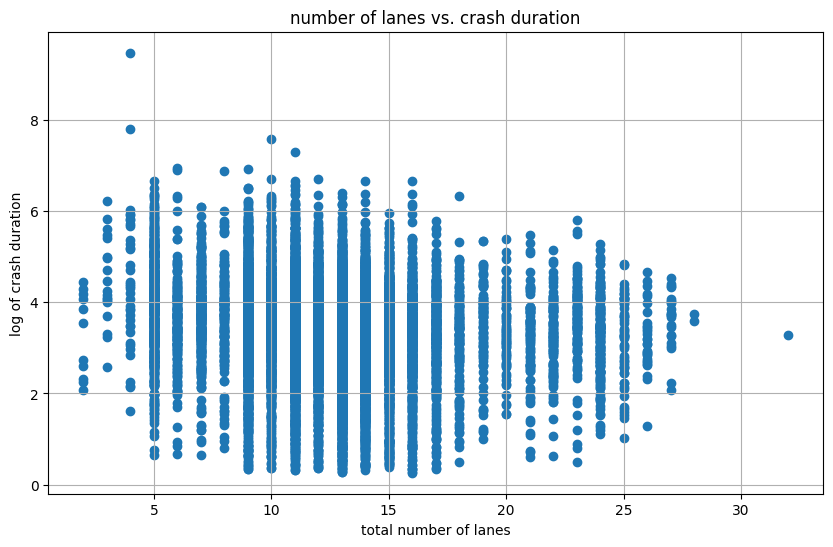

In [ ]:
# Speed at Crash vs. Crash Duration
plt.figure(figsize=(10, 6))
plt.scatter(df_crash['speed_at_crash'], df_crash['log_duration'])
plt.xlabel('Speed at Crash')
plt.ylabel('log of Crash Duration (minutes)')
plt.title('Speed at Crash vs. Crash Duration')
plt.grid(True)
plt.show()

# Hour vs Crash duration
plt.figure(figsize=(10, 6))
plt.scatter(df_crash['hour'], df_crash['log_duration'])
plt.xlabel('hour of the day')
plt.ylabel('log of crash duration')
plt.title('Hour vs. Crash Duration')
plt.grid(True)
plt.show()

# Number of Lanes vs Crash duration
plt.figure(figsize=(10, 6))
plt.scatter(df_crash['total_lanes'], df_crash['log_duration'])
plt.xlabel('total number of lanes')
plt.ylabel('log of crash duration')
plt.title('number of lanes vs. crash duration')
plt.grid(True)
plt.show()

### The number of crash duration is tends to be shorter when there are higher number of functional lanes

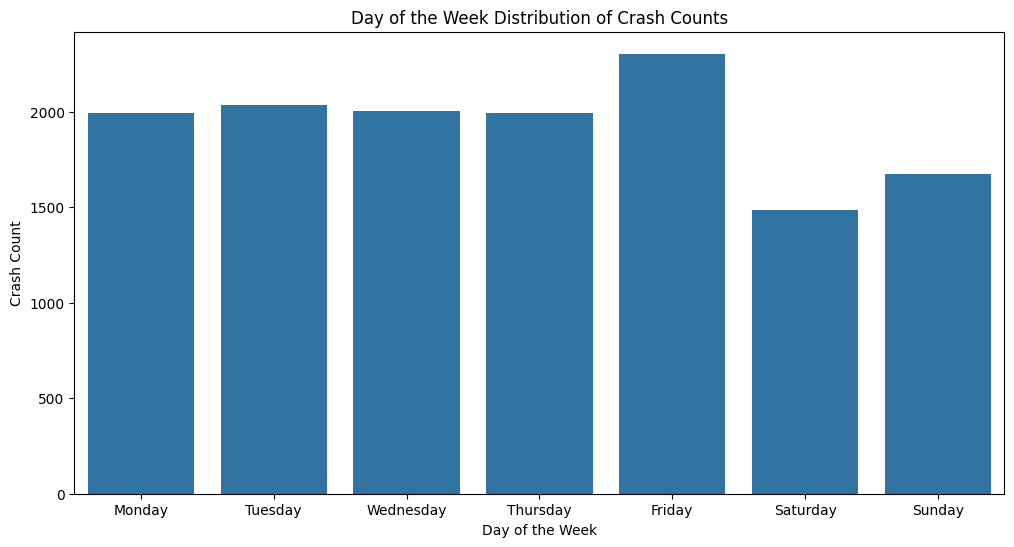

In [ ]:
# Day of the week distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=df_crash,
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of the Week Distribution of Crash Counts')
plt.xlabel('Day of the Week')
plt.ylabel('Crash Count')
plt.show()

### Observation: Number of accidents higher during weekdays and lower on weekends

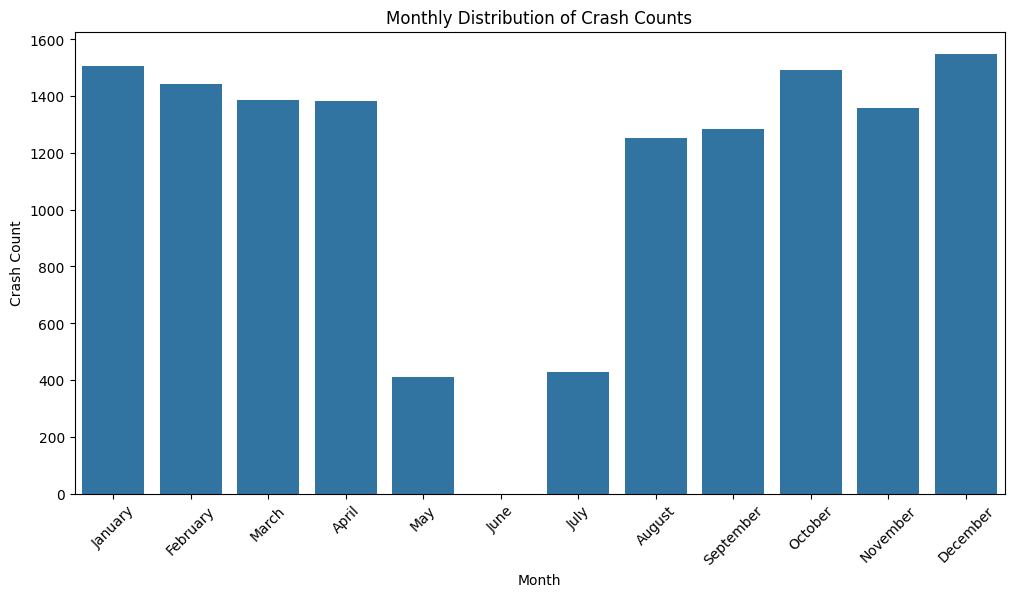

In [ ]:
# Monthly distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=df_crash,
              order=['January', 'February', 'March', 'April', 'May', 'June',
                     'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Monthly Distribution of Crash Counts')
plt.xlabel('Month')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.show()

## Insights:

Hourly Distribution:
Crashes peak during morning rush hours (7-9 AM) and evening rush hours (4-6 PM).

This makes sense as relatively higher traffic densities are observed during typical commuting times.

Day of the Week Distribution:
Fridays show the highest number of crashes, possibly due to higher traffic volume and end-of-week travel.
Weekends have fewer crashes, likely due to reduced commuter traffic.

Monthly Distribution:
Crashes are higher in winter months (January, February, December), possibly due to poor weather conditions like snow and ice.
A significant dip in May, June, and July could indicate seasonal factors like vacations or clearer vision and roads.

## Analysis 3: Visualization to show the relationship between crash duration and the total number of vehicles involved in the crash

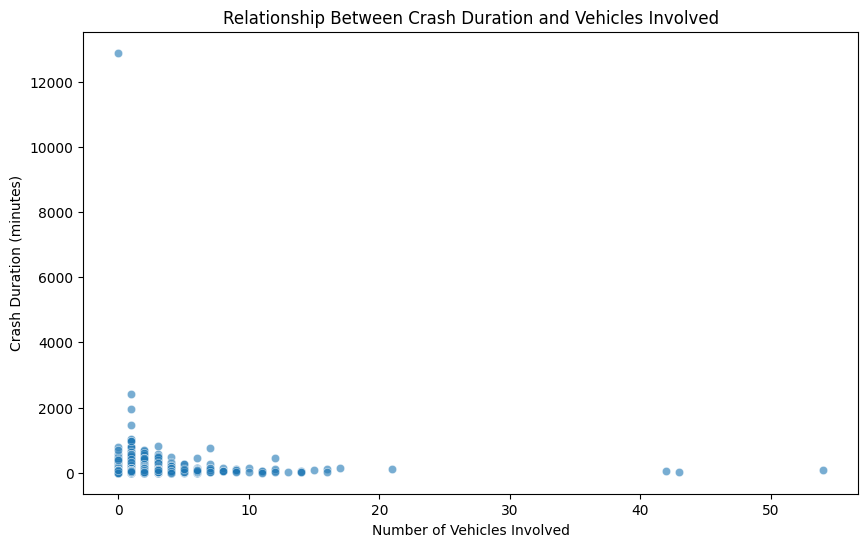

Correlation Coefficient between Crash Duration and Vehicles Involved: 0.01


In [ ]:
# Scatter plot of crash duration vs vehicles involved
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vehicle_count', y='duration', data=df_crash, alpha=0.6) #alpha= 0.6 to ensure overlapping points remain visible
plt.title('Relationship Between Crash Duration and Vehicles Involved')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Crash Duration (minutes)')
plt.show()

# Calculating correlation coefficient to measure the strength and direction of relationship
correlation = df_crash['vehicle_count'].corr(df_crash['duration'])
print(f"Correlation Coefficient between Crash Duration and Vehicles Involved: {correlation:.2f}")

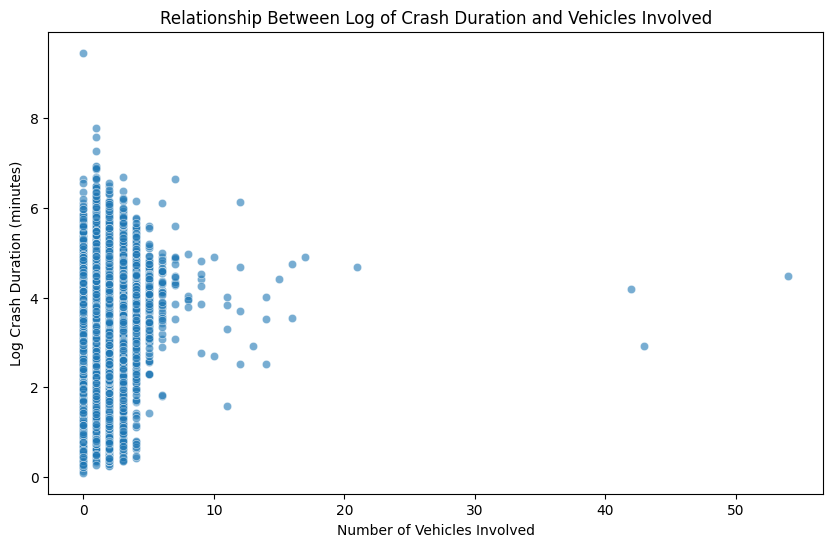

Correlation Coefficient between Crash Log Duration and Vehicles Involved: 0.10


In [ ]:
# Scatter plot of crash duration vs vehicles involved
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vehicle_count', y='log_duration', data=df_crash, alpha=0.6) #alpha= 0.6 to ensure overlapping points remain visible
plt.title('Relationship Between Log of Crash Duration and Vehicles Involved')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Log Crash Duration (minutes)')
plt.show()

# Calculating correlation coefficient to measure the strength and direction of relationship
correlation = df_crash['vehicle_count'].corr(df_crash['log_duration'])
print(f"Correlation Coefficient between Crash Log Duration and Vehicles Involved: {correlation:.2f}")

### Z-score clipping for reducing the effect of outliers

In [ ]:
#Let us cap the outliers (values around 99 percentile minutes for the Duration column)
duration_cap = df_crash['duration'].quantile(0.99)
df_crash['duration_capped'] = df_crash['duration'].clip(upper=duration_cap)

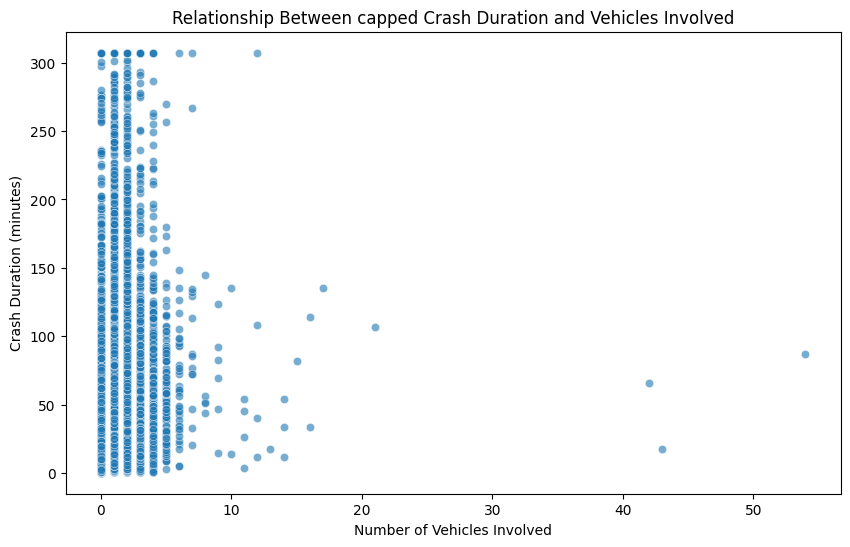

Correlation Coefficient between Crash Duration and Vehicles Involved: 0.05


In [ ]:
# Scatter plot of crash duration vs vehicles involved after removing the outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vehicle_count', y='duration_capped', data=df_crash, alpha=0.6)
plt.title('Relationship Between capped Crash Duration and Vehicles Involved')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Crash Duration (minutes)')
plt.show()

# Calculating correlation coefficient
correlation = df_crash['vehicle_count'].corr(df_crash['duration_capped'])
print(f"Correlation Coefficient between Crash Duration and Vehicles Involved: {correlation:.2f}")

## Observations:
Initial Relationship (Uncapped Duration):
The relationship between crash duration and the number of vehicles involved is weak (correlation coefficient ≈ 0.01).
The presence of outliers (e.g., crash durations > 2000 minutes) skews our data.

After Capping the Duration:
By capping durations at the 99th percentile, the correlation coefficient slightly improves to 0.05, but the relationship remains weak.

**Most crashes involve fewer vehicles (0-10), and durations tend to be short.**

**Crash Duration does not appear strongly correlated with the number of vehicles involved. This suggests other factors, such as crash severity, location, or road conditions, might influence the duration to greater extent.**

## Analysis 4: Visualizing crash counts based on the segment functional road class

In [ ]:
# Merge df_crash and df_segment on 'segment_id'
df_crash_segment = df_crash.merge(df_segment[['segment_id', 'func_class']], on='segment_id', how='left')

# Group by 'func_class' and count crashes
crash_count_by_func_class = df_crash_segment['func_class'].value_counts().reset_index()
crash_count_by_func_class.columns = ['func_class', 'crash_count']

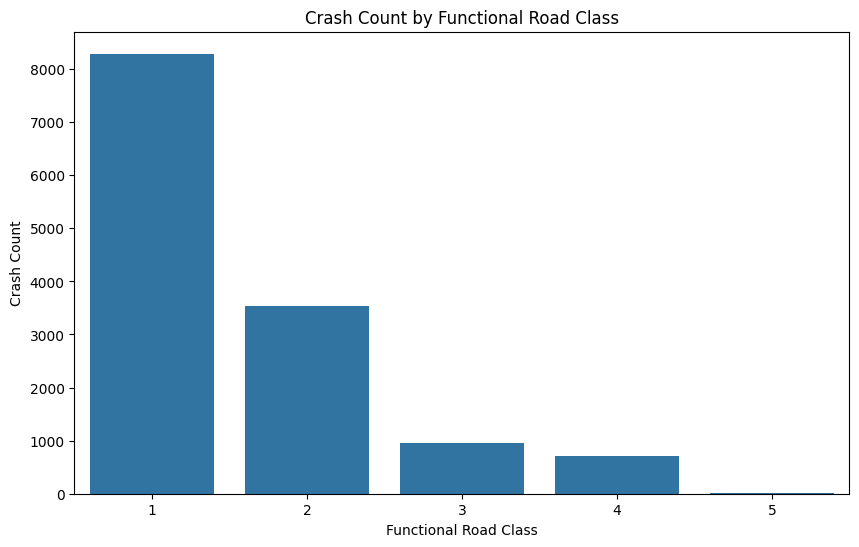

In [ ]:
# Plotting the crash count by functional road class
plt.figure(figsize=(10, 6))
sns.barplot(x='func_class', y='crash_count', data=crash_count_by_func_class)
plt.title('Crash Count by Functional Road Class')
plt.xlabel('Functional Road Class')
plt.ylabel('Crash Count')
plt.show()


## Observations:
Functional Road Class 1 has the highest number of crashes, followed by Class 2.
Road classes 3, 4, and 5 have significantly fewer crashes.

## Analysis 5: Analyzing the pattern between daily VMT (Vehicle Miles Traveled) and total crash counts

In [ ]:
# Calculating VMT (Vehicle Miles Traveled) in the segment_info dataset using the formula given in the question
df_segment['VMT'] = df_segment['aadt'] * df_segment['miles']

# Calculating crash counts per segment
crash_counts = df_crash['segment_id'].value_counts().reset_index()
crash_counts.columns = ['segment_id', 'crash_count']

# Merging VMT and crash counts
df_vmt_crash = crash_counts.merge(df_segment[['segment_id', 'VMT']], on='segment_id', how='left')


In [ ]:
df_vmt_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   segment_id   2133 non-null   object 
 1   crash_count  2133 non-null   int64  
 2   VMT          2133 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 50.1+ KB


In [ ]:
# Calculating correlation coefficient
correlation = df_vmt_crash['VMT'].corr(df_vmt_crash['crash_count'])
print(f"Correlation Coefficient between VMT and Crash Count: {correlation:.2f}")


Correlation Coefficient between VMT and Crash Count: 0.36


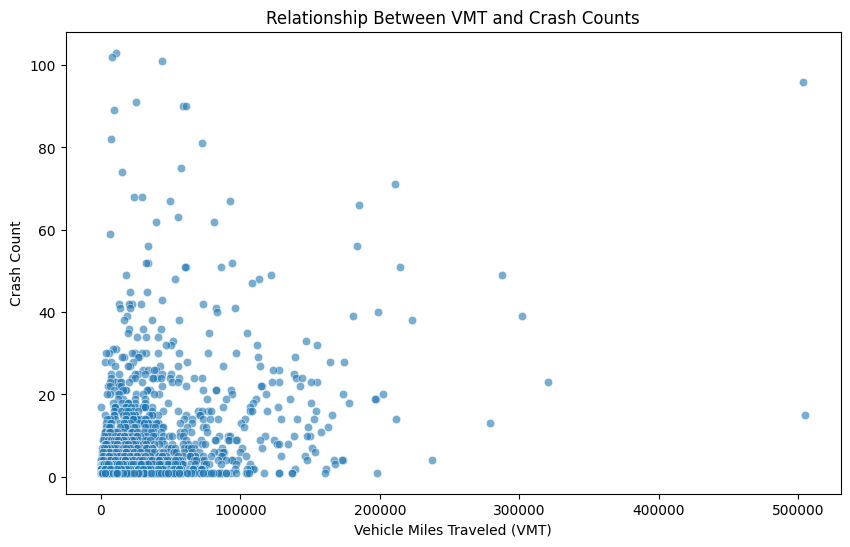

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='VMT', y='crash_count', data=df_vmt_crash, alpha=0.6)
plt.title('Relationship Between VMT and Crash Counts')
plt.xlabel('Vehicle Miles Traveled (VMT)')
plt.ylabel('Crash Count')
plt.show()


### Lets try binning to see if we can get a clearer view of VMT's relationship with crash counts

In [ ]:
# Defining VMT bins and labels
vmt_bins = [0, 50000, 100000, 200000, 500000]  # Adjust the bin ranges if needed
vmt_labels = ['Low (0-50k)', 'Medium (50k-100k)', 'High (100k-200k)', 'Very High (200k-500k)']

# Creating a new column for VMT bins
df_vmt_crash['VMT_Bin'] = pd.cut(df_vmt_crash['VMT'], bins=vmt_bins, labels=vmt_labels, right=True)

# Grouping by VMT bins and calculating total crash counts
vmt_crash_summary = df_vmt_crash.groupby('VMT_Bin')['crash_count'].sum().reset_index()

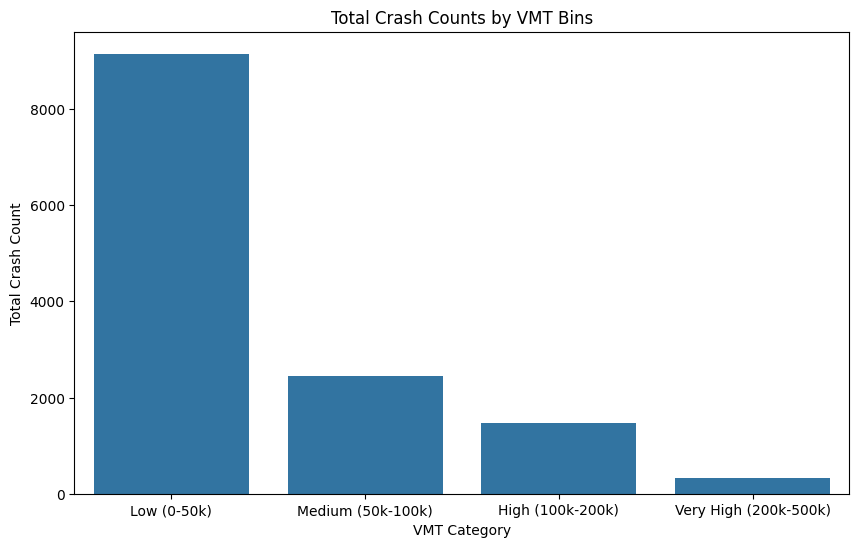

In [ ]:
# Plotting crash counts for each VMT bin
plt.figure(figsize=(10, 6))
sns.barplot(x='VMT_Bin', y='crash_count', data=vmt_crash_summary)
plt.title('Total Crash Counts by VMT Bins')
plt.xlabel('VMT Category')
plt.ylabel('Total Crash Count')
plt.show()


##  Analysis 6: Developing Linear Regression and Random Forest models to estimate crash duration

A linear regression model is built on several assumptions inlcuding but not limited to the rule of thumb that our datasets are normally distributed.

We will have to build a robust Regression model to ensure that there is no multicolinearity and heteroskedasticity (that is changing variance in errors).


**Roadmap:**

Data Preprocessing:
Handle missing values, outliers, and categorical variables.

Feature Engineering:
Feature selection method such as backward elimination (e.g., correlation, VIF, Backward Elimination).

Linear Regression:
Test assumptions (multicollinearity, heteroskedasticity).

Random Forest:
Compare performance with Linear Regression.

Model Evaluation:
Use metrics like R², RMSE, and feature importance.

In [ ]:
df_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13496 entries, 0 to 13495
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   event_id            13496 non-null  object        
 1   segment_id          13496 non-null  object        
 2   event_subtype       13496 non-null  object        
 3   start_tstamp        13496 non-null  datetime64[ns]
 4   closed_tstamp       13496 non-null  datetime64[ns]
 5   precipitation_flag  13496 non-null  object        
 6   precip_rate         13487 non-null  float64       
 7   speed_at_crash      13308 non-null  float64       
 8   reference_speed     13308 non-null  float64       
 9   arrived             13052 non-null  object        
 10  notified            8589 non-null   object        
 11  total_lanes         12908 non-null  float64       
 12  open_lanes          12908 non-null  float64       
 13  closed_lanes        12908 non-null  float64   

In [ ]:
df_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   segment_id  2133 non-null   object 
 1   road        2133 non-null   object 
 2   direction   2133 non-null   object 
 3   miles       2133 non-null   float64
 4   road_class  2133 non-null   object 
 5   func_class  2133 non-null   int64  
 6   aadt        2133 non-null   int64  
 7   VMT         2133 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 133.4+ KB


In [ ]:
df_speed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253288 entries, 0 to 3253287
Data columns (total 3 columns):
 #   Column              Dtype  
---  ------              -----  
 0   segment_id          object 
 1   measurement_tstamp  object 
 2   speed               float64
dtypes: float64(1), object(2)
memory usage: 74.5+ MB


### Calculating deciles for the 'hour' column and binning them

In [ ]:
#Calculating deciles for the 'hour' column
deciles = df_crash['hour'].quantile(np.linspace(0, 1, 11))

# Creating bins based on deciles
bins = deciles.tolist()

# Use pd.cut to bin the 'hour' column
df_crash['hour_decile'] = pd.cut(df_crash['hour'], bins=bins, labels=False, include_lowest=True)

# Display the first few rows to check the new 'hour_decile' column
print(df_crash[['hour', 'hour_decile']].head())

   hour  hour_decile
0     0            0
1     0            0
2     1            0
3     1            0
4     2            0


In [ ]:
# Merging df_segment and df_speed with df_crash
avg_speed = df_speed.groupby('segment_id')['speed'].mean().reset_index().rename(columns={'speed': 'avg_speed'})

# Merging segment info and speed data into crash data
df_combined = df_crash.merge(df_segment, on='segment_id', how='left')
df_combined = df_combined.merge(avg_speed, on='segment_id', how='left')

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13496 entries, 0 to 13495
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   event_id            13496 non-null  object        
 1   segment_id          13496 non-null  object        
 2   event_subtype       13496 non-null  object        
 3   start_tstamp        13496 non-null  datetime64[ns]
 4   closed_tstamp       13496 non-null  datetime64[ns]
 5   precipitation_flag  13496 non-null  object        
 6   precip_rate         13487 non-null  float64       
 7   speed_at_crash      13308 non-null  float64       
 8   reference_speed     13308 non-null  float64       
 9   arrived             13052 non-null  object        
 10  notified            8589 non-null   object        
 11  total_lanes         12908 non-null  float64       
 12  open_lanes          12908 non-null  float64       
 13  closed_lanes        12908 non-null  float64   

## Pre-processing data for training ML models

### Converting days of the week to trignometric functions (sine and cosine) so that later days of the week are not incorrectly interpreted by regression models as features with greater weights.

#### We have observed earlier that most and least accidents have occured on fridays and sundays, respectively. Hence, we are taking this step.

In [ ]:
# Mapping day_of_week to numerical values (1 = Monday, ..., 7 = Sunday)
day_map = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
           'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df_combined['day_of_week_num'] = df_combined['day_of_week'].map(day_map)

# Mapping month to numerical values (1 = January, ..., 12 = December)
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
             'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df_combined['month_num'] = df_combined['month'].map(month_map)

# Applying cyclical transformations
df_combined['day_sin'] = np.sin(2 * np.pi * df_combined['day_of_week_num'] / 7)
df_combined['day_cos'] = np.cos(2 * np.pi * df_combined['day_of_week_num'] / 7)

df_combined['month_sin'] = np.sin(2 * np.pi * df_combined['month_num'] / 12)
df_combined['month_cos'] = np.cos(2 * np.pi * df_combined['month_num'] / 12)

df_combined['hour_sin'] = np.sin(2 * np.pi * df_combined['hour'] / 24)
df_combined['hour_cos'] = np.cos(2 * np.pi * df_combined['hour'] / 24)

# Dropping intermediate numeric columns to avoid redundancy
df_combined = df_combined.drop(columns=['day_of_week_num', 'month_num', 'hour'], errors='ignore')

In [ ]:
df_combined[['day_sin', 'day_cos', 'month_sin', 'month_cos', 'hour_sin', 'hour_cos']].head()

,day_sin,day_cos,month_sin,month_cos,hour_sin,hour_cos
0,0.974928,-0.222521,0.5,0.866025,0.000000,1.000000
1,0.974928,-0.222521,0.5,0.866025,0.000000,1.000000
2,0.974928,-0.222521,0.5,0.866025,0.258819,0.965926
3,0.974928,-0.222521,0.5,0.866025,0.258819,0.965926
4,0.974928,-0.222521,0.5,0.866025,0.500000,0.866025


In [ ]:
# Checking for Non-Numeric Columns
non_numeric_cols = final_features.select_dtypes(exclude=['number']).columns
print(f"Non-Numeric Columns: {non_numeric_cols}")

# Checking for NaNs
nan_counts = final_features.isnull().sum()
print(f"Columns with NaNs: {nan_counts[nan_counts > 0]}")

# Checking for Infinite Values
inf_values = final_features[(final_features == np.inf) | (final_features == -np.inf)].count()
print(f"Columns with Inf Values: {inf_values[inf_values > 0]}")


Non-Numeric Columns: Index(['road_condition_Ice/Snow', 'road_condition_Unspecified',
       'road_condition_Wet', 'road_condition_Wet - chemicals',
       'event_subtype_injury accident', 'event_subtype_serious accident',
       'precipitation_flag_Rain', 'precipitation_flag_Snow',
       'road_class_Interstate', 'road_class_Other',
       ...
       'road_road_12200143', 'road_road_12200534', 'road_road_12200630',
       'road_road_12201643', 'road_road_12201644', 'road_road_12218361',
       'road_road_12218373', 'road_road_12218382', 'road_road_12218385',
       'road_road_12219481'],
      dtype='object', length=296)
Columns with NaNs: Series([], dtype: int64)
Columns with Inf Values: Series([], dtype: int64)


### Feature Engineering Stage 1: VIF Analysis

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Perform One-Hot Encoding for Categorical Variables
categorical_cols = ['road_condition', 'event_subtype', 'precipitation_flag', 'road_class', 'road', 'func_class']  # Add relevant categorical columns
encoded_cats = pd.get_dummies(df_combined[categorical_cols], drop_first=True)

# Step 2: Combine All Numerical and Encoded Categorical Features
final_features = pd.concat([
    df_combined[[
        'vehicle_count', 'total_lanes', 'precip_rate', 'reference_speed', 'speed_at_crash',
        'VMT', 'miles', 'aadt', 'avg_speed',  # Segment and speed features
        'day_sin', 'day_cos', 'month_sin', 'month_cos', 'hour_sin', 'hour_cos'  # Cyclical features
    ]],
    encoded_cats  # One-hot encoded categorical features
], axis=1)

# Step 3: Ensure All Columns Are Numeric
# 1. Replace non-numeric, infinite, and NaN values
final_features = final_features.replace([np.inf, -np.inf], np.nan)  # Replace inf values
final_features = final_features.apply(pd.to_numeric, errors='coerce')  # Coerce all columns to numeric
final_features = final_features.fillna(0)  # Fill any remaining NaNs with 0 (optional, dropna can be used too)

# 2. Check column types and convert all to float
final_features = final_features.astype(float)

# Step 4: Calculate VIF for All Features
vif_data = pd.DataFrame()
vif_data['Feature'] = final_features.columns

# Calculate VIF for each feature
try:
    vif_data['VIF'] = [variance_inflation_factor(final_features.values, i) for i in range(final_features.shape[1])]
except Exception as e:
    print("Error calculating VIF:", e)

# Display VIF results
print("Variance Inflation Factor (VIF):")
print(vif_data.sort_values(by='VIF', ascending=False))


Variance Inflation Factor (VIF):
                    Feature          VIF
27      road_class_US Route  1165.487936
26   road_class_State Route  1077.347302
24    road_class_Interstate  1030.064375
32       road_road_11000073   258.484605
39       road_road_11000091   226.430809
..                      ...          ...
267      road_road_11014966     1.037895
297      road_road_11053941     1.031248
268      road_road_11015040     1.022808
277      road_road_11018572     1.018703
300      road_road_11054552     1.010435

[312 rows x 2 columns]


In [ ]:
vif_data.sort_values(by='VIF', ascending=False).head(10)

,Feature,VIF
27,road_class_US Route,1165.487936
26,road_class_State Route,1077.347302
24,road_class_Interstate,1030.064375
32,road_road_11000073,258.484605
39,road_road_11000091,226.430809
37,road_road_11000089,174.467518
49,road_road_11000103,174.065701
44,road_road_11000097,159.531567
53,road_road_11000110,150.941622
51,road_road_11000105,140.971783


In [ ]:
# Identifying features with high VIF
high_vif_features = vif_data[vif_data['VIF'] > 5]['Feature'].tolist()
print(f"Features with High VIF (> 5): {high_vif_features}")

# Dropping high-VIF features from the dataset
final_features = final_features.drop(columns=high_vif_features, errors='ignore')

# Recalculating VIF
vif_data_new = pd.DataFrame()
vif_data_new['Feature'] = final_features.columns
vif_data_new['VIF'] = [variance_inflation_factor(final_features.values, i) for i in range(final_features.shape[1])]

# Displaying updated VIF results
print("Updated VIF After Dropping High-VIF Features:")
print(vif_data_new.sort_values(by='VIF', ascending=False))


Features with High VIF (> 5): ['VMT', 'miles', 'func_class', 'road_class_Interstate', 'road_class_Other', 'road_class_State Route', 'road_class_US Route', 'road_road_11000066', 'road_road_11000070', 'road_road_11000071', 'road_road_11000072', 'road_road_11000073', 'road_road_11000079', 'road_road_11000080', 'road_road_11000081', 'road_road_11000089', 'road_road_11000091', 'road_road_11000092', 'road_road_11000094', 'road_road_11000095', 'road_road_11000096', 'road_road_11000097', 'road_road_11000098', 'road_road_11000100', 'road_road_11000101', 'road_road_11000102', 'road_road_11000103', 'road_road_11000104', 'road_road_11000105', 'road_road_11000110', 'road_road_11000112', 'road_road_11000115', 'road_road_11000116', 'road_road_11000117', 'road_road_11000154', 'road_road_11000156', 'road_road_11000165', 'road_road_11000166', 'road_road_11000167', 'road_road_11000169', 'road_road_11000170', 'road_road_11000172', 'road_road_11000173', 'road_road_11000179', 'road_road_11000180', 'road_roa

In [ ]:
vif_data_new.sort_values(by='VIF', ascending=False).head(5)

,Feature,VIF
3,reference_speed,22.614384
4,speed_at_crash,10.283063
1,total_lanes,8.500467
5,aadt,5.284725
0,vehicle_count,2.587450


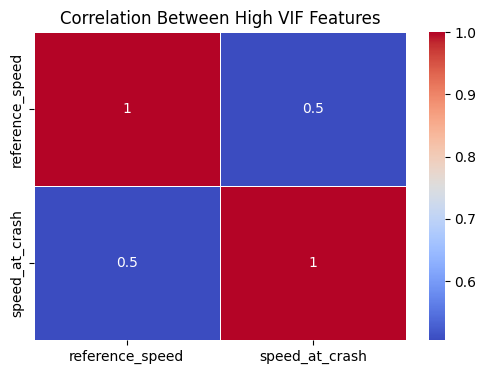

In [ ]:
# Computing correlation matrix
correlation_matrix = final_features[['reference_speed', 'speed_at_crash']].corr()

# Plot heatmap of correlations for relevant features
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix[['reference_speed', 'speed_at_crash']].sort_values(by='reference_speed', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between High VIF Features")
plt.show()

In [ ]:
# Dropping 'reference_speed' due to its high VIF value
final_features1 = final_features.drop(columns=['reference_speed'], errors='ignore')

# Recalculating VIF
vif_data_new1 = pd.DataFrame()
vif_data_new1['Feature'] = final_features1.columns
vif_data_new1['VIF'] = [variance_inflation_factor(final_features1.values, i) for i in range(final_features1.shape[1])]

# Displaying updated VIF results
print("Updated VIF After Dropping 'reference_speed':")
print(vif_data_new1.sort_values(by='VIF', ascending=False))


Updated VIF After Dropping 'reference_speed':
                     Feature       VIF
1                total_lanes  7.411743
3             speed_at_crash  4.675642
4                       aadt  4.578597
0              vehicle_count  2.463533
19   precipitation_flag_Snow  2.217422
..                       ...       ...
180       road_road_11015040  1.000580
193       road_road_11018766  1.000568
160       road_road_11001247  1.000540
96        road_road_11000887  1.000538
175       road_road_11001480  1.000524

[222 rows x 2 columns]


In [ ]:
vif_data_new1.sort_values(by='VIF', ascending=False).head(10)

,Feature,VIF
1,total_lanes,7.411743
3,speed_at_crash,4.675642
4,aadt,4.578597
0,vehicle_count,2.463533
19,precipitation_flag_Snow,2.217422
12,road_condition_Ice/Snow,1.993126
18,precipitation_flag_Rain,1.718158
14,road_condition_Wet,1.678499
16,event_subtype_injury accident,1.374383
15,road_condition_Wet - chemicals,1.349811


##Observations:

VIF values of the remaining features are acceptable:
All remaining features now have VIF < 10, indicating low levels of multicollinearity.

Remaining Features:

Key features like total_lanes, speed_at_crash, aadt, and others are ready for modeling.

Cyclical features (day_sin, hour_cos, month_cos, etc.) remain stable with very low VIF values.

## Building ML models

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Defining features and target
X = final_features1
y = df_combined['duration']  # Replace with your target variable

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


# Evaluation Metrics
print("Linear Regression:")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.4f}")

Linear Regression:
R² Score: 0.1179
RMSE: 240.4418
MAE: 36.4841


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest:")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.4f}")


Random Forest:
R² Score: 0.1692
RMSE: 233.3429
MAE: 37.2830


In [ ]:
# Log-transform the target variable
y_log = np.log1p(df_combined['duration'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Retrain the models with log-transformed target
rf_model.fit(X_train, y_train)
y_pred_rf_log = rf_model.predict(X_test)

# Evaluate after transforming predictions back
y_pred_rf = np.expm1(y_pred_rf_log)
print("Random Forest with Log-Transformed Target:")
print(f"R² Score: {r2_score(np.expm1(y_test), y_pred_rf):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(np.expm1(y_test), y_pred_rf)):.4f}")
print(f"MAE: {mean_absolute_error(np.expm1(y_test), y_pred_rf):.4f}")


Random Forest with Log-Transformed Target:
R² Score: 0.0483
RMSE: 249.7344
MAE: 34.6863


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Defining parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest and GridSearch
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)

# Fit GridSearch
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best R² Score: 0.19172640948532227


In [ ]:
# Best parameters from GridSearch
best_params = {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

# Retraining the Random Forest with best parameters
rf_tuned = RandomForestRegressor(**best_params, random_state=42)
rf_tuned.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf_tuned = rf_tuned.predict(X_test)

# Evaluating performance
print("Tuned Random Forest Performance:")
print(f"R² Score: {r2_score(y_test, y_pred_rf_tuned):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf_tuned):.4f}")


Tuned Random Forest Performance:
R² Score: 0.2063
RMSE: 0.9537
MAE: 0.7391


In [ ]:
final_features1.columns

Index(['vehicle_count', 'total_lanes', 'precip_rate', 'speed_at_crash', 'aadt',
       'avg_speed', 'day_sin', 'day_cos', 'month_sin', 'month_cos',
       ...
       'road_road_12200143', 'road_road_12200534', 'road_road_12200630',
       'road_road_12201643', 'road_road_12201644', 'road_road_12218361',
       'road_road_12218373', 'road_road_12218382', 'road_road_12218385',
       'road_road_12219481'],
      dtype='object', length=222)

In [ ]:
final_features1

,vehicle_count,total_lanes,precip_rate,speed_at_crash,aadt,avg_speed,day_sin,day_cos,month_sin,month_cos,hour_sin,hour_cos,road_condition_Ice/Snow,road_condition_Unspecified,road_condition_Wet,road_condition_Wet - chemicals,event_subtype_injury accident,event_subtype_serious accident,precipitation_flag_Rain,precipitation_flag_Snow,road_road_11000083,road_road_11000090,road_road_11000106,road_road_11000114,road_road_11000119,road_road_11000120,road_road_11000146,road_road_11000155,road_road_11000171,road_road_11000174,road_road_11000175,road_road_11000177,road_road_11000178,road_road_11000185,road_road_11000194,road_road_11000220,road_road_11000222,road_road_11000224,road_road_11000413,road_road_11000415,road_road_11000420,road_road_11000425,road_road_11000494,road_road_11000498,road_road_11000501,road_road_11000503,road_road_11000524,road_road_11000525,road_road_11000563,road_road_11000569,...,road_road_11001422,road_road_11001423,road_road_11001424,road_road_11001480,road_road_11001607,road_road_11001608,road_road_11001609,road_road_11014966,road_road_11015040,road_road_11015553,road_road_11018262,road_road_11018267,road_road_11018290,road_road_11018316,road_road_11018324,road_road_11018347,road_road_11018572,road_road_11018578,road_road_11018642,road_road_11018720,road_road_11018727,road_road_11018766,road_road_11018772,road_road_11019657,road_road_11019669,road_road_11019734,road_road_11050196,road_road_11050242,road_road_11050449,road_road_11050468,road_road_11050476,road_road_11050961,road_road_11051535,road_road_11052547,road_road_11052688,road_road_11052883,road_road_11053941,road_road_11054359,road_road_11054552,road_road_12200140,road_road_12200143,road_road_12200534,road_road_12200630,road_road_12201643,road_road_12201644,road_road_12218361,road_road_12218373,road_road_12218382,road_road_12218385,road_road_12219481
0,0.0,16.0,0.62,56.0,91555.0,0.000000,0.974928,-0.222521,5.000000e-01,0.866025,0.000000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,13.0,0.00,55.0,61339.0,0.000000,0.974928,-0.222521,5.000000e-01,0.866025,0.000000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,9.0,0.00,57.0,22790.0,0.000000,0.974928,-0.222521,5.000000e-01,0.866025,0.258819,0.965926,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,12.0,0.00,50.0,16065.0,0.000000,0.974928,-0.222521,5.000000e-01,0.866025,0.258819,0.965926,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,10.0,0.00,43.0,35597.0,0.000000,0.974928,-0.222521,5.000000e-01,0.866025,0.500000,0.866025,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

### XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# GridSearchCV for Hyperparameter Tuning
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb,
                               cv=3, scoring='r2', verbose=2, n_jobs=-1)

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# Best Parameters and Model
best_xgb_params = grid_search_xgb.best_params_
print("Best Parameters for XGBoost:", best_xgb_params)

# Evaluate the Best Model
xgb_best = XGBRegressor(**best_xgb_params, random_state=42)
xgb_best.fit(X_train, y_train)
y_pred_xgb = xgb_best.predict(X_test)

# Performance Metrics
print("\nXGBoost Performance:")
print(f"R² Score: {r2_score(y_test, y_pred_xgb):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb):.4f}")


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}

XGBoost Performance:
R² Score: 0.2078
RMSE: 0.9529
MAE: 0.7381


###Removing Less impactful columns based on VIF table

In [ ]:
# Creating a list of columns to keep
cols_to_keep = ['vehicle_count', 'total_lanes', 'precip_rate', 'speed_at_crash', 'aadt', 'avg_speed', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'hour_sin', 'hour_cos', 'road_condition_Ice/Snow', 'road_condition_Unspecified', 'road_condition_Wet', 'road_condition_Wet - chemicals', 'event_subtype_injury accident', 'event_subtype_serious accident', 'precipitation_flag_Rain', 'precipitation_flag_Snow']

# Check if all the columns exist
missing_cols = set(cols_to_keep) - set(final_features1.columns)
if missing_cols:
    print(f"Warning: Columns not found in DataFrame: {missing_cols}")
    # Handle the missing columns appropriately, e.g., remove them from cols_to_keep
    cols_to_keep = [col for col in cols_to_keep if col not in missing_cols]


# Select only the specified columns
final_features2 = final_features1[cols_to_keep]

In [ ]:
final_features2

,vehicle_count,total_lanes,precip_rate,speed_at_crash,aadt,avg_speed,day_sin,day_cos,month_sin,month_cos,hour_sin,hour_cos,road_condition_Ice/Snow,road_condition_Unspecified,road_condition_Wet,road_condition_Wet - chemicals,event_subtype_injury accident,event_subtype_serious accident,precipitation_flag_Rain,precipitation_flag_Snow
0,0.0,16.0,0.62,56.0,91555.0,0.000000,0.974928,-0.222521,5.000000e-01,0.866025,0.000000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,13.0,0.00,55.0,61339.0,0.000000,0.974928,-0.222521,5.000000e-01,0.866025,0.000000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,9.0,0.00,57.0,22790.0,0.000000,0.974928,-0.222521,5.000000e-01,0.866025,0.258819,0.965926,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,12.0,0.00,50.0,16065.0,0.000000,0.974928,-0.222521,5.000000e-01,0.866025,0.258819,0.965926,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,10.0,0.00,43.0,35597.0,0.000000,0.974928,-0.222521,5.000000e-01,0.866025,0.500000,0.866025,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13491,2.0,7.0,0.00,60.0,18492.0,0.000000,0.974928,-0.222521,-2.449294e-16,1.000000,-0.965926,-0.258819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13492,2.0,15.0,0.00,67.0,77295.0,65.747709,0.974928,-0.222521,-2.449294e-16,1.000000,-0.965926,-0.258819,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13493,0.0,15.0,0.00,0.0,50871.0,0.000000,0.974928,-0.222521,-2.449294e-16,1.000000,-0.965926,0.258819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13494,1.0,16.0,0.00,0.0,50583.0,0.000000,0.974928,-0.222521,-2.449294e-16,1.000000,-0.866025,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Defining features and target
X = final_features2
y = df_combined['duration']  # Replace with your target variable

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


# Evaluation Metrics
print("Linear Regression:")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.4f}")

Linear Regression:
R² Score: 0.0139
RMSE: 254.2195
MAE: 37.0569


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model= lr_model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate accuracy
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


R² Score: 0.1179
RMSE: 240.4418
MAE: 36.4841


In [ ]:
from sklearn.model_selection import cross_val_score

# 5-Fold Cross-Validation
scores = cross_val_score(model, X, y, scoring='r2', cv=5)
print(f"Cross-Validation R² Scores: {scores}")
print(f"Mean R²: {scores.mean():.4f}")


Cross-Validation R² Scores: [ 9.37839913e-02 -3.07955616e+14 -1.63394168e+10  1.69529937e-01
 -1.40806423e+11]
Mean R²: -61622552416580.7344


### Feature Importance

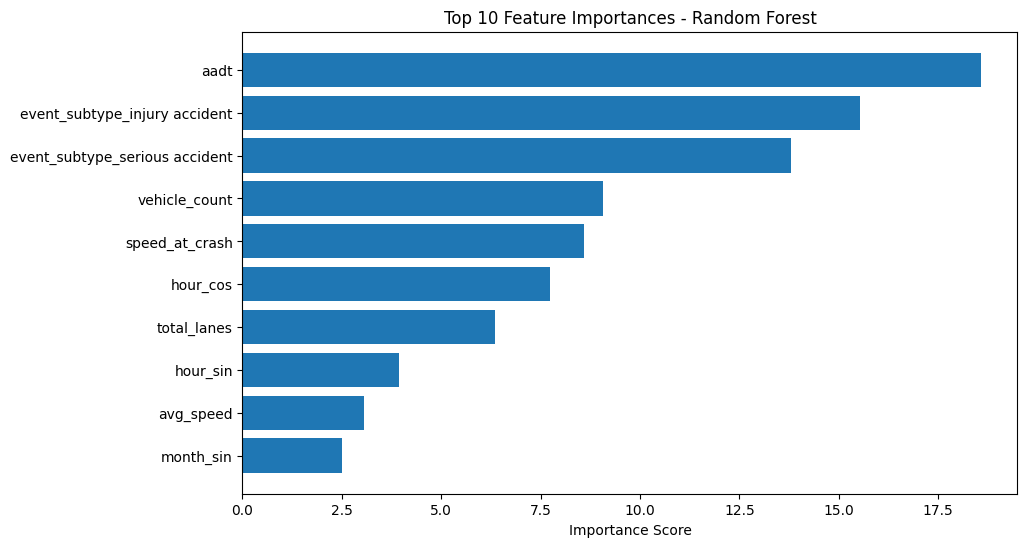

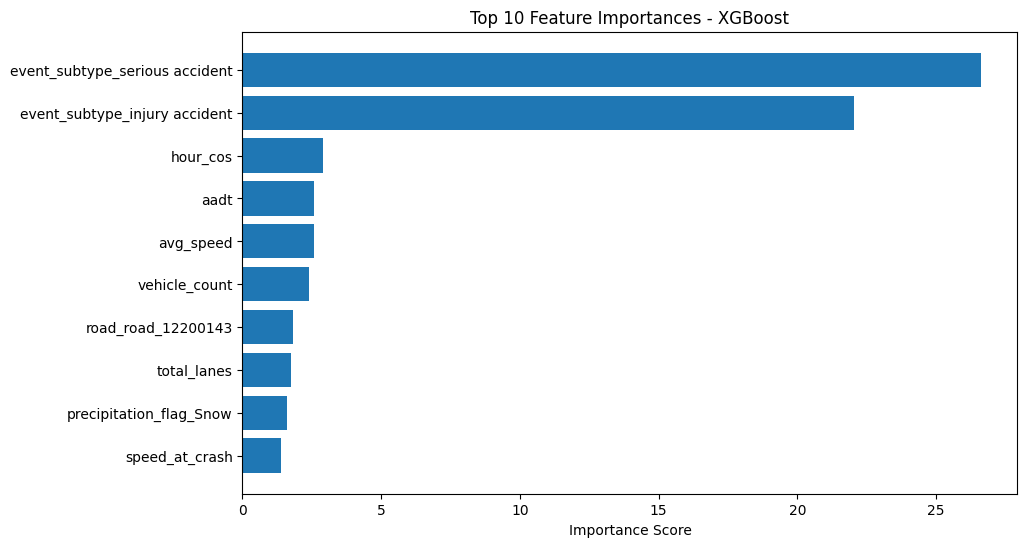

In [ ]:
# Extract feature importances from the trained models
rf_importances = rf_tuned.feature_importances_
xgb_importances = xgb_best.feature_importances_

# Create a DataFrame for visualization
feature_names = X_train.columns
rf_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances}).sort_values(by='Importance', ascending=False)
xgb_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_importances}).sort_values(by='Importance', ascending=False)

# Plot Random Forest Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'][:10], rf_importance_df['Importance'][:10]*100)
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.show()

# Plot XGBoost Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(xgb_importance_df['Feature'][:10], xgb_importance_df['Importance'][:10]*100)
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances - XGBoost")
plt.xlabel("Importance Score")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Identify top 2 features from both models
top_2_rf_features = rf_importance_df['Feature'].iloc[:2].tolist()  # Top 2 Random Forest features
top_2_xgb_features = xgb_importance_df['Feature'].iloc[:2].tolist()  # Top 2 XGBoost features

# Combine the top features from both models (remove duplicates)
features_to_drop = list(set(top_2_rf_features + top_2_xgb_features))  # Combine and remove duplicates

# Drop these features from train and test datasets
X_train_new = X_train.drop(columns=features_to_drop, errors='ignore')  # Drop from train set
X_test_new = X_test.drop(columns=features_to_drop, errors='ignore')    # Drop from test set

print(f"Features Dropped: {features_to_drop}")
print(f"New X_train Shape: {X_train_new.shape}")
print(f"New X_test Shape: {X_test_new.shape}")

# Train New Random Forest Model
rf_model_new = RandomForestRegressor(random_state=42, n_estimators=100)  # Use the best params if available
rf_model_new.fit(X_train_new, y_train)
y_pred_rf_new = rf_model_new.predict(X_test_new)

# Evaluate the New Random Forest Model
print("New Random Forest (Without Top 2 Features):")
print(f"R² Score: {r2_score(y_test, y_pred_rf_new):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf_new)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf_new):.4f}")

# Train New XGBoost Model
xgb_model_new = XGBRegressor(random_state=42, n_estimators=100)  # Use the best params if available
xgb_model_new.fit(X_train_new, y_train)
y_pred_xgb_new = xgb_model_new.predict(X_test_new)

# Evaluate the New XGBoost Model
print("\nNew XGBoost (Without Top 2 Features):")
print(f"R² Score: {r2_score(y_test, y_pred_xgb_new):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb_new)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb_new):.4f}")


Features Dropped: ['event_subtype_injury accident', 'aadt', 'event_subtype_serious accident']
New X_train Shape: (10796, 219)
New X_test Shape: (2700, 219)
New Random Forest (Without Top 2 Features):
R² Score: 0.1906
RMSE: 230.3140
MAE: 40.5367

New XGBoost (Without Top 2 Features):
R² Score: 0.2975
RMSE: 214.5737
MAE: 37.3586



Random Forest (without top 2 features)
R² Score: 0.1906 (previously 0.2063)
RMSE: 230.31 (previously 233.34)
MAE: 40.53 (previously 37.28)

Conclusion: The R² has slightly decreased, and the errors (RMSE, MAE) have increased. This suggests that the dropped features were significant for the Random Forest model.
XGBoost (without top 2 features)
R² Score: 0.2975 (previously 0.2078)
RMSE: 214.57 (previously 233.34)
MAE: 37.35 (previously 37.28)
Conclusion: The R² has increased significantly (from 0.2078 to 0.2975), and both RMSE and MAE have improved. This suggests that removing the top 2 features improved XGBoost's ability to generalize.

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split

# Define the base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42))
]

# Define the stacked model
stacked_model = StackingRegressor(estimators=base_models, final_estimator=RandomForestRegressor(random_state=42))

# Train the stacked model
stacked_model.fit(X_train_new, y_train)

# Make predictions
y_pred_stacked = stacked_model.predict(X_test_new)

# Evaluate stacked model
print("\nStacked Model (Random Forest + XGBoost):")
print(f"R² Score: {r2_score(y_test, y_pred_stacked):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_stacked)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_stacked):.4f}")



Stacked Model (Random Forest + XGBoost):
R² Score: 0.0005
RMSE: 255.9299
MAE: 41.5683


Observation: Ensemble model did not perform as well as the previous XGBoost model without the top 2 features as per feature importance plot

##Next importance method:
Using Permutation Importance:
Permutation importance works by shuffling each feature individually and observing the model's change in performance.

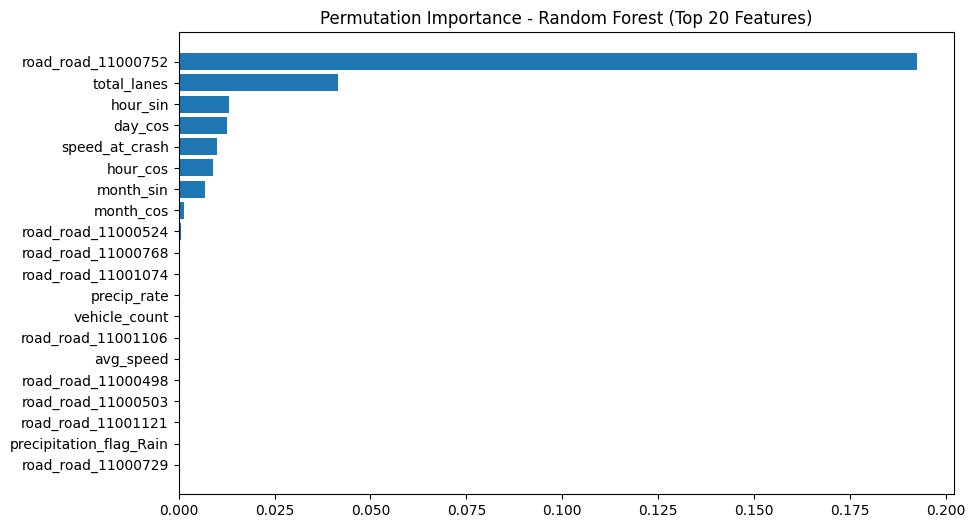

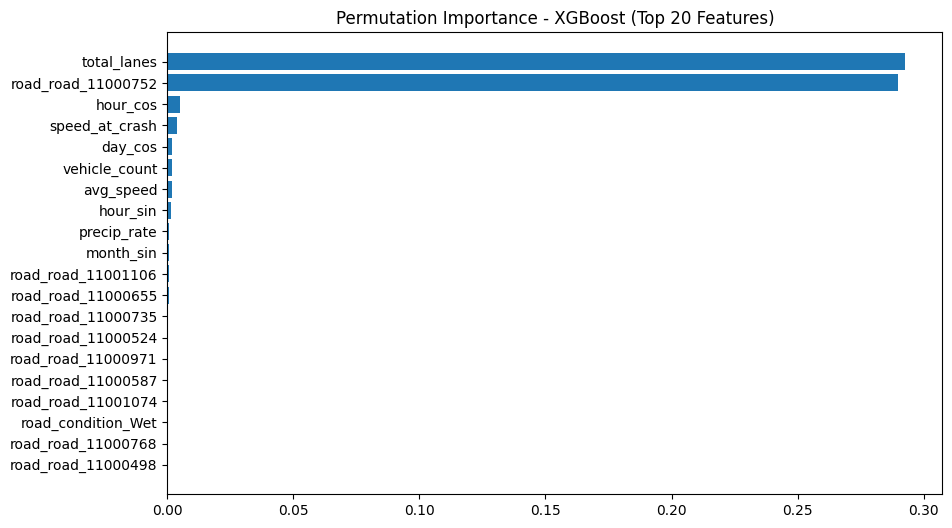

In [ ]:
from sklearn.inspection import permutation_importance

# Random Forest Permutation Importance
rf_permutation_importance = permutation_importance(rf_model_new, X_test_new, y_test, n_repeats=10, random_state=42)
rf_perm_df = pd.DataFrame({'Feature': X_test_new.columns, 'Importance': rf_permutation_importance.importances_mean})
rf_perm_df = rf_perm_df.sort_values(by='Importance', ascending=False)

# XGBoost Permutation Importance
xgb_permutation_importance = permutation_importance(xgb_model_new, X_test_new, y_test, n_repeats=10, random_state=42)
xgb_perm_df = pd.DataFrame({'Feature': X_test_new.columns, 'Importance': xgb_permutation_importance.importances_mean})
xgb_perm_df = xgb_perm_df.sort_values(by='Importance', ascending=False)

# Plot top 20 features
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(rf_perm_df['Feature'][:20], rf_perm_df['Importance'][:20])
plt.gca().invert_yaxis()
plt.title("Permutation Importance - Random Forest (Top 20 Features)")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(xgb_perm_df['Feature'][:20], xgb_perm_df['Importance'][:20])
plt.gca().invert_yaxis()
plt.title("Permutation Importance - XGBoost (Top 20 Features)")
plt.show()


### Decision Trees


Decision Tree (Depth = 10):
R² Score: 0.3117
RMSE: 212.3807
MAE: 39.5095


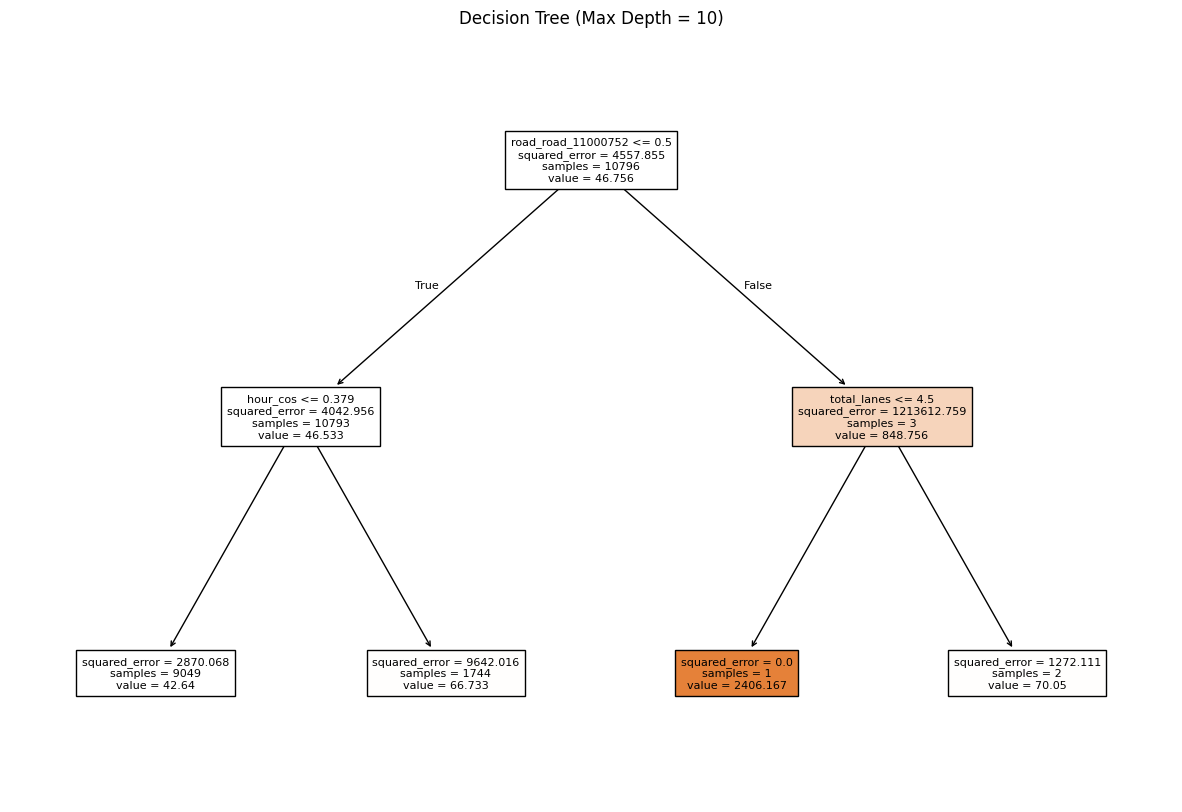

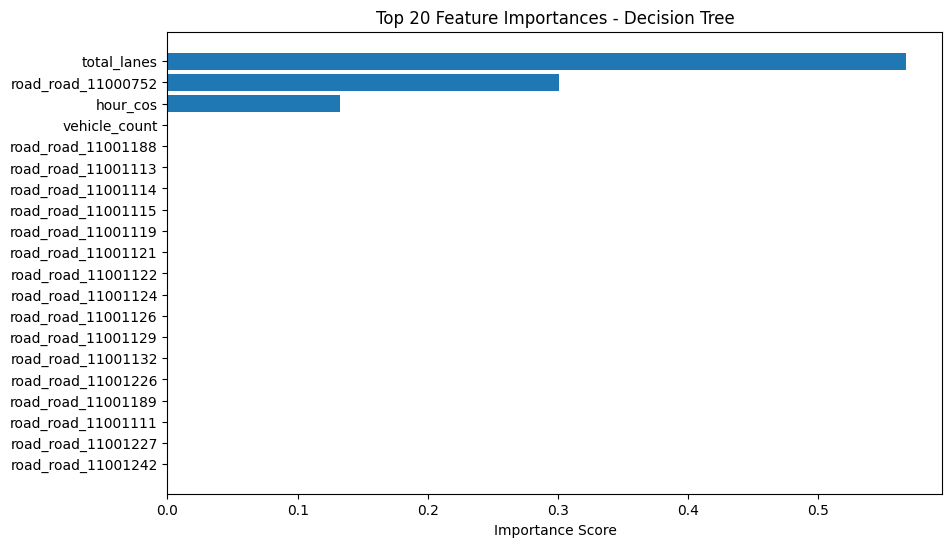

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Step 1: Train Decision Tree Model
dt_model = DecisionTreeRegressor(max_depth=2, random_state=42)  # You can tune max_depth if needed
dt_model.fit(X_train_new, y_train)

# Step 2: Predict on test set
y_pred_dt = dt_model.predict(X_test_new)

# Step 3: Evaluate the Decision Tree Model
print("\nDecision Tree (Depth = 10):")
print(f"R² Score: {r2_score(y_test, y_pred_dt):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_dt)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_dt):.4f}")

# Step 4: Visualize the Tree (optional, but useful)
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X_train_new.columns, filled=True, fontsize=8)
plt.title("Decision Tree (Max Depth = 10)")
plt.show()

# Step 5: Plot Feature Importance
importance_df = pd.DataFrame({'Feature': X_train_new.columns, 'Importance': dt_model.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20])
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances - Decision Tree")
plt.xlabel("Importance Score")
plt.show()


In [ ]:
# Evaluating the model

r2 = r2_score(y_test, y_pred_dt)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae = mean_absolute_error(y_test, y_pred_dt)

print(f"Depth: {depth}, R-squared: {r2:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

# Selecting best performance (e.g., based on R-squared)
if r2 > best_accuracy:
    best_accuracy = r2
    best_depth = depth

Depth: 2, R-squared: 0.3117, RMSE: 212.3807, MAE: 39.5095


#Conclusion: Best model in terms of ability to generalize is Decision Trees

## Analysis 7: Distribution of the speed ratio for non-crash time intervals vs. crash time intervals for the segments with more than 75 crashes per year.

In [ ]:
df_segment.info(), df_crash.info(), df_speed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   segment_id  2133 non-null   object 
 1   road        2133 non-null   object 
 2   direction   2133 non-null   object 
 3   miles       2133 non-null   float64
 4   road_class  2133 non-null   object 
 5   func_class  2133 non-null   int64  
 6   aadt        2133 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 116.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13496 entries, 0 to 13495
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id            13496 non-null  object 
 1   segment_id          13496 non-null  object 
 2   event_subtype       13496 non-null  object 
 3   start_tstamp        13496 non-null  object 
 4   closed_tstamp       13496 non-null  object 
 5   prec

(None, None, None)

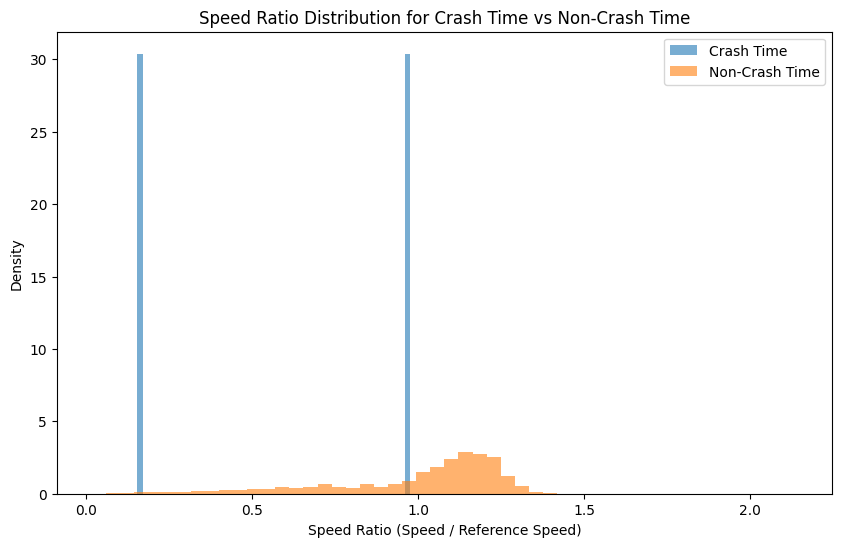

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parsing Dates and Convert to UTC to Avoid Timezone Mismatch
if pd.api.types.is_datetime64tz_dtype(df_crash['start_tstamp']):
    # If the timestamps are already tz-aware, just convert to UTC
    df_crash['start_tstamp'] = df_crash['start_tstamp'].dt.tz_convert('UTC')
    df_crash['closed_tstamp'] = df_crash['closed_tstamp'].dt.tz_convert('UTC')
else:
    # If timestamps are not tz-aware, localize to UTC
    df_crash['start_tstamp'] = pd.to_datetime(df_crash['start_tstamp'], utc=True)
    df_crash['closed_tstamp'] = pd.to_datetime(df_crash['closed_tstamp'], utc=True)

df_speed['measurement_tstamp'] = pd.to_datetime(df_speed['measurement_tstamp'], utc=True)

# Calculating 5-minute Intervals for Each Crash
def get_5_min_intervals(start, end):
    """Generate 5-minute intervals for a given start and end time."""
    return pd.date_range(start=start, end=end, freq='5min', tz='UTC')

df_crash['crash_intervals'] = df_crash.apply(lambda row: get_5_min_intervals(row['start_tstamp'], row['closed_tstamp']), axis=1)
df_crash_exploded = df_crash.explode('crash_intervals')  # Unnest the 5-minute intervals

# Filtering Segments with More than 75 Crashes Per Year
df_crash['year'] = df_crash['start_tstamp'].dt.year  # Extract year
crashes_per_segment = df_crash.groupby(['segment_id', 'year']).size().reset_index(name='crash_count')
segments_over_75_crashes = crashes_per_segment[crashes_per_segment['crash_count'] > 75]['segment_id'].unique()

# Filtering only the crashes for these segments
df_crash_filtered = df_crash_exploded[df_crash_exploded['segment_id'].isin(segments_over_75_crashes)]

# Round Speed Timestamps to 5-minute Intervals
df_speed['interval_rounded'] = df_speed['measurement_tstamp'].dt.floor('5min')

# Merging Speed Data with Crash Intervals
df_merged = pd.merge(
    df_speed,
    df_crash_filtered[['segment_id', 'crash_intervals', 'reference_speed']],
    left_on=['segment_id', 'interval_rounded'],
    right_on=['segment_id', 'crash_intervals'],
    how='left',
    indicator=True
)

# Label Time Intervals as 'crash_time' or 'non_crash_time'
df_merged['time_label'] = np.where(df_merged['_merge'] == 'both', 'crash_time', 'non_crash_time')

# Calculate Speed Ratio (Speed / Reference Speed)
df_merged['reference_speed'] = df_merged['reference_speed'].fillna(df_merged['speed'].mean())  # Handle missing reference speed
df_merged['speed_ratio'] = df_merged['speed'] / df_merged['reference_speed']

# Plot Speed Ratio Distributions for Crash Time vs Non-Crash Time
plt.figure(figsize=(10, 6))

# Separate the data into crash and non-crash times
crash_time_speed_ratio = df_merged[df_merged['time_label'] == 'crash_time']['speed_ratio'].dropna()
non_crash_time_speed_ratio = df_merged[df_merged['time_label'] == 'non_crash_time']['speed_ratio'].dropna()

# Plot distributions
plt.hist(crash_time_speed_ratio, bins=50, alpha=0.6, label='Crash Time', density=True)
plt.hist(non_crash_time_speed_ratio, bins=50, alpha=0.6, label='Non-Crash Time', density=True)
plt.title('Speed Ratio Distribution for Crash Time vs Non-Crash Time')
plt.xlabel('Speed Ratio (Speed / Reference Speed)')
plt.ylabel('Density')
plt.legend()
plt.show()


## Checking for Constant or Imputed reference_speed Values

In [ ]:
# Investigating reference speed during crash vs. non-crash time
crash_reference_speed = df_merged[df_merged['time_label'] == 'crash_time']['reference_speed']
non_crash_reference_speed = df_merged[df_merged['time_label'] == 'non_crash_time']['reference_speed']

# Descriptive statistics
print("Reference Speed During Crash Time:")
print(crash_reference_speed.describe())

print("\nReference Speed During Non-Crash Time:")
print(non_crash_reference_speed.describe())

# Check for unique reference speed values during crash time
print("\nUnique Reference Speeds During Crash Time:")
print(crash_reference_speed.value_counts().head(10))  # Top 10 most frequent values


Reference Speed During Crash Time:
count     2.000000
mean     63.000000
std       4.242641
min      60.000000
25%      61.500000
50%      63.000000
75%      64.500000
max      66.000000
Name: reference_speed, dtype: float64

Reference Speed During Non-Crash Time:
count    3.253286e+06
mean     5.700361e+01
std      3.172695e-09
min      5.700361e+01
25%      5.700361e+01
50%      5.700361e+01
75%      5.700361e+01
max      5.700361e+01
Name: reference_speed, dtype: float64

Unique Reference Speeds During Crash Time:
reference_speed
60.0    1
66.0    1
Name: count, dtype: int64


## Comparing Actual Speed Values

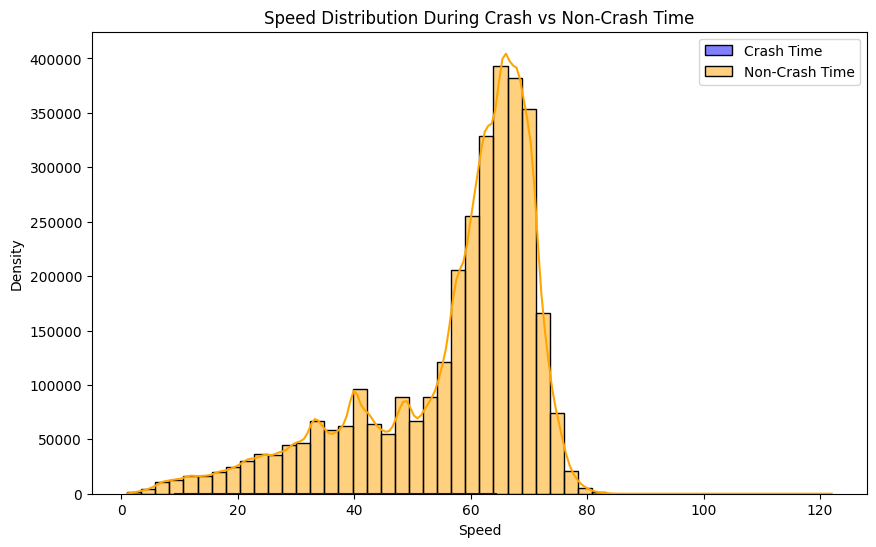

In [ ]:
plt.figure(figsize=(10, 6))

# Plot speed distributions
sns.histplot(df_merged[df_merged['time_label'] == 'crash_time']['speed'].dropna(), bins=50, color='blue', label='Crash Time', kde=True)
sns.histplot(df_merged[df_merged['time_label'] == 'non_crash_time']['speed'].dropna(), bins=50, color='orange', label='Non-Crash Time', kde=True)

plt.title("Speed Distribution During Crash vs Non-Crash Time")
plt.xlabel("Speed")
plt.ylabel("Density")
plt.legend()
plt.show()


## Identifying extreme values or placeholders (e.g., zeros or defaults) for speed or reference_speed

In [ ]:
# Checking for zero or unrealistic speed values
print("Speed == 0 During Crash Time:")
print(df_merged[(df_merged['speed'] == 0) & (df_merged['time_label'] == 'crash_time')].shape[0])

print("\nSpeed == 0 During Non-Crash Time:")
print(df_merged[(df_merged['speed'] == 0) & (df_merged['time_label'] == 'non_crash_time')].shape[0])

# Checking for reference_speed == 0
print("\nReference Speed == 0 During Crash Time:")
print(df_merged[(df_merged['reference_speed'] == 0) & (df_merged['time_label'] == 'crash_time')].shape[0])


Speed == 0 During Crash Time:
0

Speed == 0 During Non-Crash Time:
0

Reference Speed == 0 During Crash Time:
0


No unrealistic values detected!